# Coursera
### Wesleyan University Data Analysis and Interpretation Specialization

Course 4: Machine Learning for Data Analysis<br>
Week 4: Running a k-means Cluster Analysis<br>
Author: Matt Clark


### Instructions:
<blockquote>
This week’s assignment involves running a k-means cluster analysis. Cluster analysis is an unsupervised machine learning method that partitions the observations in a data set into a smaller set of clusters where each observation belongs to only one cluster. The goal of cluster analysis is to group, or cluster, observations into subsets based on their similarity of responses on multiple variables. Clustering variables should be primarily quantitative variables, but binary variables may also be included.

Your assignment is to run a k-means cluster analysis to identify subgroups of observations in your data set that have similar patterns of response on a set of clustering variables.

WHAT TO SUBMIT:

Following completion of the steps described above, create a blog entry where you submit syntax used to run a k-means cluster analysis (copied and pasted from your program) along with corresponding output and a brief written summary. Please note that your reviewers should NOT be required to download any files in order to complete the review.

This assignment does NOT require you to run your cluster analysis again on a test data set. You are welcome to do so, but you are only required to run your cluster analysis once on your training data set. If your data set has a relatively small number of observations, you do not need to split into training and test data sets. You can provide your rationale for not splitting your data set in your written summary.
</blockquote>

### Data Preparation:

#### Import libraries.

In [1]:
from pathlib import Path
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 

#### Generate Dataframe.

In [2]:
root_dir = Path().resolve().parents[1]
df = pd.read_csv(str(root_dir)+'/ool_pds.csv', low_memory=False)

#### Prepare k-means Cluster Analysis model.

In [3]:
# columns to be used for our k-means cluster analysis model.
kmdf_vars = ['PPEDUCAT', 'PPETHM', 'W1_A1', 'W1_A5A', 'W1_C1', 'W1_C2', 'W1_F2', 'W1_F3', 'W1_F4_D', 'W1_G2', 'W1_H1', 'W1_J2', 'W1_F6', 'W1_P2']

In [4]:
# columns to be used for our clustering per se.
clust_vars = ['PPEDUCAT', 'PPETHM', 'W1_A1', 'W1_A5A', 'W1_C1', 'W1_C2', 'W1_F2', 'W1_F3', 'W1_F4_D', 'W1_G2', 'W1_H1', 'W1_J2', 'W1_F6']

In [5]:
#column to be used for validation
val_vars = ['W1_P2',]

#### Coerce model columns to numeric type.

In [6]:
for i in df[kmdf_vars]:
    df[i] = df[i].apply(pd.to_numeric, errors='coerce' )


#### Recode predictor variables.

In [7]:
ppeducatrecode = {1: 0, 2: 1, 3: 2, 4: 3}
df.PPEDUCAT = df.PPEDUCAT.map(ppeducatrecode)

In [8]:
ppethmrecode = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}
df.PPETHM = df.PPETHM.map(ppethmrecode)

In [9]:
# W1_A1: How interested are you in what's going on in government and politics?
# 0: Not 4: very
w1a1recode = {-1: np.nan, 5: 0, 4: 1, 3: 2, 2: 3, 1: 4}
df.W1_A1 = df.W1_A1.map(w1a1recode)

In [10]:
# W1_A5A:  Who did you vote for? 0: Obama, 1: McCain
w1a5arecode = {2: 0, 1: 1, 3: np.nan, -1: np.nan}
df.W1_A5A = df.W1_A5A.map(w1a5arecode)

In [11]:
# recode W1_C1 to be a binary variable, with 0: Democrat, 1: Republican
w1c1recode = {-1: np.nan, 1: 1, 2: 0, 3: np.nan, 4: np.nan}
df.W1_C1 = df.W1_C1.map(w1c1recode)

In [12]:
# W1_C2: We hear a lot of talk these days about liberals and conservatives. Where would you
# place YOURSELF on this 7 point scale?
w1c2recode = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, -1: np.nan}
df.W1_C2 = df.W1_C2.map(w1c2recode)

In [13]:
# W1_F2: Are you optimistic/pessimistic/neither about the future of the united states.
w1f2recode = {3: 0, 2: 1, 1: 2, -1: np.nan}
df.W1_F2 = df.W1_F2.map(w1f2recode)

In [14]:
# W1_F3: A basic American belief has been that if you work hard you can get ahead and reach
# the goals you set and more. Is this true or false today?
w1f3recode = {7: 0, 6: 1, 5: 2, 4: 3, 3: 4, 2: 5, 1: 6, -1: np.nan}
df.W1_F3 = df.W1_F3.map(w1f3recode)

In [15]:
# W1_F4_D :  [To become wealthy ] For yourself and people like you, how easy or hard is it to
# reach these goals?
w1f4drecode = {-1: np.nan,}
df.W1_F4_D = df.W1_F4_D.replace(w1f4drecode)

In [16]:
# W1_G2: Now thinking about the country's economy, would you say that compared to one year
# ago, the nation's economy is now better, about the same, or worse?
w1g2recode = {3: 0, 2: 1, 1: 2, -1: np.nan}
df.W1_G2 = df.W1_G2.map(w1g2recode)

In [17]:
# W1_H1: Society has reached the point where Blacks and Whites have equal opportunities for
#achievement.
w1h1recode = {5: 0, 4: 1, 3: 2, 2: 3, 1: 4, -1: np.nan}
df.W1_H1 = df.W1_H1.map(w1h1recode)

In [18]:
# W1_J2: Which of the following statements comes closest to your view concerning same-sex
#couples?
w1j2recode = {3: 0, 2: 1, 1: 2, -1: np.nan}
df.W1_J2 = df.W1_J2.map(w1j2recode)

In [19]:
w1f6recode = {-1: np.nan, 1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9}
df.W1_F6 = df.W1_F6.map(w1f6recode)

### Recode validation variable.

In [20]:
w1p2recode = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, -1: np.nan}
df.W1_P2 = df.W1_P2.map(w1p2recode)

#### This is the DataFrame we will use for our k-means Cluster Analysis.

In [21]:
kmdf = df[kmdf_vars].copy().dropna()
clust = kmdf[clust_vars]
val = kmdf[val_vars]

#### Set the $\mu = 0$, $\sigma = 1$, for our cluster variables. Notice the suppressed error message.

In [22]:
from sklearn import preprocessing
pd.options.mode.chained_assignment = None  # default='warn'

for i in kmdf.columns:
    kmdf[i] = preprocessing.scale(kmdf[i].astype('float64'))   

#### Train, test, split the data.

In [23]:
clus_train, clus_test = train_test_split(clust, test_size=.3, random_state=123)

# k-means cluster analysis for 1-9 clusters                                                           

clust=range(1,10)
meandist=[]

for k in clust:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) 
    / clus_train.shape[0])

#### Elbow Plot.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

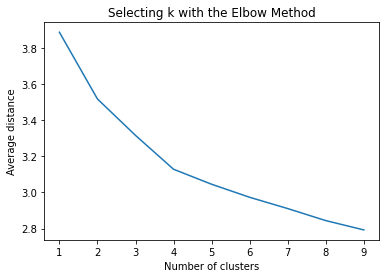

In [24]:
plt.plot(clust, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')


#### 4 cluster solution.
The Elbow plot suggests that we try 2 or 4 clusters. We will analyze for four clusters, even though two clusters may give us a better separation.

In [25]:
model4=KMeans(n_clusters=4)
model4.fit(clus_train)
clusassign=model4.predict(clus_train)

#### Plot Clusters.

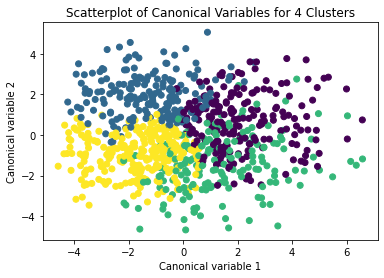

In [26]:
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model4.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 4 Clusters')
plt.show()

### Merge cluster assignment with clustering variables to examine cluster variable means by cluster:

#### Create a unique identifier variable from the index for the cluster training data to merge with the cluster assignment variable.

In [27]:
clus_train.reset_index(level=0, inplace=True)

#### Create a list that has the new index variable.

In [28]:
cluslist=list(clus_train['index'])

#### Create a list of cluster assignments.

In [29]:

labels=list(model4.labels_)

#### Combine index variable list with cluster assignment list into a dictionary

In [32]:
newlist=dict(zip(cluslist, labels))
# newlist.head(5)

#### Convert newlist dictionary to a DataFrame.

In [33]:
newclus=DataFrame.from_dict(newlist, orient='index')
newclus.head(5)

,0
906,3
1225,2
679,1
1522,1
823,2


#### Rename the cluster assignment column.

In [34]:
newclus.columns = ['clust']

#### Now we do the same for the cluster assignment variable. We create a unique identifier variable from the index for the cluster assignment DataFrame to merge with cluster training data.

In [35]:
newclus.reset_index(level=0, inplace=True)

#### Now we merge the cluster assignment dataframe with the cluster training variable dataframe by the index variable.

In [36]:
merged_train=pd.merge(clus_train, newclus, on='index')
merged_train.head(n=5)

,index,PPEDUCAT,PPETHM,W1_A1,W1_A5A,W1_C1,W1_C2,W1_F2,W1_F3,W1_F4_D,W1_G2,W1_H1,W1_J2,W1_F6,clust
0,906,1,1,3.0,0.0,0.0,3.0,2.0,5.0,3.0,1.0,0.0,2.0,5.0,3
1,1225,2,4,1.0,1.0,1.0,5.0,1.0,0.0,2.0,0.0,3.0,0.0,5.0,2
2,679,0,0,3.0,1.0,1.0,5.0,0.0,5.0,1.0,0.0,3.0,1.0,6.0,1
3,1522,1,0,3.0,1.0,1.0,6.0,0.0,5.0,1.0,0.0,3.0,0.0,6.0,1
4,823,2,1,1.0,0.0,0.0,3.0,0.0,2.0,1.0,0.0,0.0,2.0,4.0,2


#### Cluster frequencies.

In [37]:
merged_train.clust.value_counts()

3    262
0    203
1    186
2    174
Name: clust, dtype: int64

#### Then we will calculate clustering variable means by cluster.

In [38]:
clustergrp = merged_train.groupby('clust').mean()
print ("Clustering variable means by cluster")
print(clustergrp)

Clustering variable means by cluster
             index  PPEDUCAT    PPETHM     W1_A1    W1_A5A     W1_C1  \
clust                                                                  
0      1149.187192  1.453202  0.871921  2.251232  0.118227  0.123153   
1      1044.155914  1.849462  0.548387  2.548387  0.645161  0.661290   
2      1211.390805  2.091954  0.729885  2.522989  0.189655  0.189655   
3      1145.374046  2.251908  0.927481  2.816794  0.019084  0.034351   

          W1_C2     W1_F2     W1_F3   W1_F4_D     W1_G2     W1_H1     W1_J2  \
clust                                                                         
0      3.054187  1.325123  4.477833  1.344828  1.004926  1.669951  1.004926   
1      4.473118  0.956989  4.564516  1.747312  0.650538  2.677419  0.844086   
2      2.603448  0.827586  1.344828  1.241379  0.977011  1.247126  1.206897   
3      2.000000  1.503817  4.740458  1.679389  1.339695  1.053435  1.301527   

          W1_F6  
clust            
0      3.290640  
1

#### We validate the clusters in our training data by examining differences in the clusters in our validation variable (Class / W1_P2) using ANOVA. First we merge the W1_P2 data with clustering variables and cluster assignment data. Then we split Class (W1_P2) data into train and test sets.

In [39]:
val_train, val_test = train_test_split(val, test_size=.3, random_state=123)
val_train1=pd.DataFrame(val_train)
val_train1.reset_index(level=0, inplace=True)
merged_train_all=pd.merge(val_train1, merged_train, on='index')
sub1 = merged_train_all[['W1_P2', 'clust']].dropna()

In [40]:
valmod = smf.ols(formula='W1_P2 ~ C(clust)', data=sub1).fit()
print (valmod.summary())

print ('means for W1_P2 by cluster')
m1= sub1.groupby('clust').mean()
print (m1)

print ('standard deviations for W1_P2 by cluster')
m2= sub1.groupby('clust').std()
print (m2)

mc1 = multi.MultiComparison(sub1['W1_P2'], sub1['clust'])
res1 = mc1.tukeyhsd()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                  W1_P2   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     37.35
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           1.24e-22
Time:                        19:46:20   Log-Likelihood:                -973.51
No. Observations:                 825   AIC:                             1955.
Df Residuals:                     821   BIC:                             1974.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1921      0.055     21.517

### Summary:
For what may be our final analysis of the Outlook On Life data set, we have performed a k-means cluster analysis, to look for clusters among 14 variables. Our variables included Level of Education, Level of interest in government and politics, candidate voted for in the 2012 presidential election, political party affiliation, placement on a spectrum ranging between liberalism and conservativism, optimism for the future of the united states, belief that a person can work hard to get ahead, opinion on the difficulty of becoming wealthy, opinion as to whether the United States economy has improve year over year, belief that racial parity has been reached in the United States, and opinion about same sex marriage. All of these variables are categorical, or dichotomous/categorical, with multi-segmented well ordered categorical variables (including 0 measures) serving as quantitative variables. We used a categorical variable indicating respondents' endorsement of socioeconomic class (poor / working class / middle class / upper-middle class / upper class) in an effort to validate our clusters.
We split our data into a training set consisting of 70% of the data and a test set including 30% of our data.
<br>
We used the Euclidean $\ell_2$ norm to conduct a k-means cluster analyses on the training data, testing against $k = 1, 2, \ldots 9$ clusters. The R-squared values were used to account for variance between clusters, and an Elbow Plot was created to give visual indication of the number of clusters that should be used. It indicated for either 2 or 4 clusters and while we realize that 2 clusters may have yielded better separation, we elected to use 4 clusters.
<br>
We reduced our original 14 variables into canonical discriminant variables, creating a scatter plot of the first two. We notice that the four clusters are densely packed, but we see a not insignificant amount of overlap, especially between the clusters represented by purple and teal colors. 
<br>
The cluster means showed good separation along most variables, especially on which presidential candiate a respondent endorsed to have voted for in the 2012 presidential election, and economic optimism.<br>
As in the example distributed with this course, we've run an Analysis of Variance (ANOVA) to search for significant difference between cluster's on the variable that we've chosen to validate (endorsed economic class), and we've used a Tukey test for post hoc comparisons between the clusters.
With an R-squared of $0.12$, the validating variable contributes a non-negligible amount of the variance between clusters, and the $p-value$ of $8.93 \times 10^{23}$ is certainly significant.
Finally, the multi comparison of means Tukey Honestly Significant difference gives pairwise significant $p-values$ for all pairs of clusters, excluding clusters 1 and 3. This indicates that there is mainly a good separation between all of our clusters, but provides support for the argument in favor of separating our data into two clusters instead of four, which analysis we may do at a later time.